# Noise Budget Notebook
This notebook explains the use of noiseBudgetModule.py module.

To see the actual python code of any function, just run self.showCode("FunctionName") where self is object of class defined in that module where the function is defined.

example:

nosbud.showCode('plotPSD')

In [1]:
import numpy as np
from uncertainties import ufloat as uf
from uncertainties import unumpy as unp
from noiseBudgetModule import noiseBudget

In [2]:
optimizedLayersParams = {
    'Name' : 'Default Noise Budget',       #Can put date-time here
    #Environmental
    'temp' : uf(305,1),                    # K, Temperature
    #Geometrical & Optical
    'cavLen' : uf(1.45, 0.01) * 0.0254,    # m, Cavity Length
    'lam' : 1064e-9,                       # m, Laser wavelength
    'pdhModInd' : uf(0.2, 0.005),          # rad, PDG Modulation Index
    'cavVis' : uf(0.35, 0.05),             # dimensionless, Cavity Visibility
    'powInc' : uf(3, 0.2)*1e-3,            # W, Incident Power
    'finesse' : uf(15000, 1000),           # dimensionless, Cavity Finesse
    'roc' : uf(1000, 5) * 1e-3,            # m, Radius of curvature of Cavity Mirrors
    'mirRad': uf(0.5, 0.01) * 0.0254,      # m, Radius of mirrors
    'nom' : 4,                             # No. of mirrors involved in experiment.
    'nob' : 2,                             # No. of laser beams in experiment
    #Substrate
    'substrate' : None,             #Substrate material object
    #Top and even numbered Coating (Numbers starting from 0) (Default GaAs)
    'evenCL' : None,
    #Odd numbered Coating (Numbers starting from 0) (Default AlGaAs)
    'oddCL' : None,
    #Coating Structure (Dictionary of arrays of material properties)
    'structure' : 'OptimizedCoatingStack.csv',
    'nol' : 57,                              #Number of coating layers
    'freq': np.logspace(-1,4,300),           #Frequency points for noise budget
    'qwl' : False
}

---

---
## Creating the noiseBudget object

noiseBudget class is supposed to carry information about the experiment and help in calculating different sources of noise.
Creation of class requires some information about Environment, geometry, optics and coating structure. The constructor functions is:

noiseBudget(params = defaultParams)

params is a parameter file (please see Default Noise Budget.nbp for example) or a python dictionary containing following information:

|Parameter  |     Key (for dictionary or Parameter file) and variable name in class | Default value | Units |
|------|------|-----|-------|
|<img width=900/>|<img width=900/>|<img width=400/>|<img width=40/>|
|Noise Budget Name                                            | Name      |      Default Noise Budget||
|Temperature of experiment                                    | temp      |      305.0+/-1.0          |       K|
|Cavity Length                                                | cavLen      |      0.03683+/-0.00025          |       m|
|Wavelength of laser                                          | lam      |      1.064e-06          |       m|
|PDH Modulation Index in FSS                                  | pdhModInd      |      0.200+/-0.005||
|Cavity Fringe Visibility                                     | cavVis      |      0.35+/-0.05||
|Incident power on cavity(ies)                                | powInc      |      0.00300+/-0.00020          |       W|
|Finesse of the cavity(ies)                                   | finesse      |      (1.50+/-0.10)e+04|-|
|Radius of curvature of cavity mirrors                        | roc      |      1.000+/-0.005          |       m|
|Radius of cavity mirrors (size)                              | mirRad   |  (0.5 +/- 0.01) * 0.0254      | m|
|Number of mirros in cavity                                   | nom      |      4          |       -|
|Number of layers in mirror coating                           | nol      |      57          |       -|
|Number of beams                                              | nob      |      2          |       -|
|Frequency span max (only when initializing by file)          | fhigh      |      10000.0          |      Hz|
|Frequency span min (only when initializing by file)          | flow       |      0.1          |      Hz|
|Number of points in frequency span (only when initializing by file) | fnop      |      300|            -|
|Frequency span (only when initializing by dictionary)        | freq       | np.logspace(-1,4,300) |    Hz|
|Should I assumed Quarter Wavelength of each layer in coating?| qwl      |      True|            -|
|Substrate material parameters file name or dictionary        | substrate      |       FusedSilica.mtl |   -|
|Even coating layer parameters file name or dictionary        | evenCL      |       GaAs.mtl  |   -|
|Odd coating layer parameters file name or dictionary         | oddCL      |      Al$_{0.92}$Ga$_{0.08}$As.mtl  |   -|
|Filename for coatStack structure or dictionary               | structure  |    None  |   -|

Note:
* providing fhigh, flow and fnop is required when initializing by file. If initilizing by dictionary, an array is expected with frequency points and key 'freq'.

---

### The Material class

All materials can be created by material class. This class is supposed to carry information about materials whose layers are used in creating coating and substrate. 

The constructor function is:

material(matParams = 'FusedSilica.mtl')


matParams is a parameter file ('---.mtl' files) or a python dictionary containing following information:

|Parameter  |     Key (for dictionary or Parameter file) and variable name in class | Fused Silica Values | Units |
|------|------|-----|-------|
|<img width=800/>|<img width=800/>|<img width=400/>|<img width=100/>|
|Materian Name (file name as well)            | Name       |       FusedSilica            | -           |
|Material Thickness                           | Thickness  |       6.35e-3 +/- 2.54e-4    | m           |
|Young's Modulus                              | Young      |       72e9 +/- 1e9           | Pa          |
|Poisson's Ratio                              | Poisson    |       0.170 +/- 0.005        | -           |
|Bulk Loss Angle of Material                  | Loss       |       1e-7 +/- 0.1e-7        | rad         |
|Shear Loss Angle of Material                 | LossShear  |       1e-7 +/- 0.1e-7        | rad         |
|Heat Conductivity of Material                | Cond       |       1.38 +/- 0.2           | $W/(m \,K)$ |
|Heat Capacity per unit Volume of material    | HeatCap    |       1.6e6 +/- 0.1e6        |$J/(K \,m^3)$|
|Nominal Refractive Index of Material         | RefInd     |       1.45 +/- 0.1           | -           |
|Coefficient of Thermal Expansion             | CTE        |       5.1e-7 +/- 0.3e-7      | 1/K         |
|Coefficient of Thermorefractive effect       | CTR        |       0 +/- 0                | 1/K         |
|Relevant photoelastic tensor component       | PET        |       0.269 +/- 1e-3         | -           |

---

### Coating Stack

Class 'stack' carried information of the coating stack as whole. This is implementation of physical world. We have some materials and we create coating stack with them. Coating stack consists of various arrays all keeping properties of each layer. Also, the last layer in coating stack is the substrate layer with appropriate width.

The constructor function is:

stack(structure = None, evenLayer = None, oddLayer = None, substrate = None, nol = 2, qwl = False, lam = 1064e-9)

There are 3 ways to create an object:

1) *Providing evenLayer, oddLayer and substrate information*:
When structure is not provided and parameter file names or dictionaries are provided for evenLayer, oddLayer and substrate construction, the stack is constructed using these materials. Layers are numbered from 0 to nol-1, 0 being the top layer. Substrate properties are added at index nol. If qwl is True, thickness information of even and odd layers are ignored and thickness are set to create quarter wavelength layers for the wavelenght lam.

2) *Providing structure as a dictionary*:
In this case, a dictionary with keys as listed in table below is given. Each element is an array of length nol+1 where last layer has substrate properties.

3) *Providing structure as a csv file*:
If structure is a string, code tries to read a file (assuming it is csv) with this name. The csv file should contain 22 columns with the following 11 parameters (1 column for nominal value and 1 column for std value). The header names should match the given values:

|Parameter  |     Key (for dictionary) and variable name in class | Header Column name for csv file | Units |
|------|------|-----|-------|
|<img width=600/>|<img width=500/>|<img width=500/>|<img width=200/>|
|	Physical Thickness Nominal Value|	PhyThick	|	PhysicalThicknessNV|	m	|
|	Physical Thickness Standard Deviation|		|	PhysicalThicknessSTD|	m	|
|	Young Modulus Nominal Value|	Young	|	YoungModulusNV|	Pa	|
|	Young Modulus Standard Deviation|		|	YoungModulusSTD|	Pa	|
|	Poisson Ratio Nominal Value|	Poisson	|	PoissonRatioNV|	-	|
|	Poisson Ratio Standard Deviation|		|	PoissonRatioSTD|	-	|
|	Bulk Loss Angle Nominal Value|	Loss	|	LossAngleNV|	rad	|
|	Bulk Loss Angle Standard Deviation|		|	LossAngleSTD|	rad	|
|	Shear Loss Angle Nominal Value|	LossShear	|	LossAngleShearNV|	rad	|
|	Shear Loss Angle Standard Deviation|		|	LossAngleShearSTD|	rad	|
|	Heat Conductivity Nominal Value|	Cond	|	HeatConductivityNV|	$W/(m \,K)$	|
|	Heat Conductivity Standard Deviation|		|	HeatConductivitySTD|	$W/(m \,K)$	|
|	Heat Capacity per unit volume Nominal Value|	HeatCap	|	HeatCapacityNV|	$J/(K \,m^3)$	|
|	Heat Capacity per unit volume Standard Deviation|		|	HeatCapacitySTD|	$J/(K \,m^3)$	|
|	Refractive Index Nominal Value|	RefInd	|	RefractiveIndexNV|	-	|
|	Refractive Index Standard Deviation|		|	RefractiveIndexSTD|	-	|
|	Coefficient of Thermal Expansion Nominal Value|	CTE	|	CTENV|	1/K	|
|	Coefficient of Thermal Expansion Standard Deviation|		|	CTESTD|	1/K	|
|	Coefficient of Thermorefractive effect Nominal Value|	CTR	|	CTRNV|	1/K	|
|	Coefficient of Thermorefractive effect Standard Deviation|		|	CTRSTD|	1/K	|
|	Photoelastic Tensor element Nominal Value|	PET	|	PETNV|	-	|
|	Photoelastic Tensor element Standard Deviation|		|	PETSTD|	-	|
|   Material Name of each Layer   | matName | MaterialName | -|

---

Following is example of a dictionary used for initializing noiseBudget object.

In [3]:
nosbud = noiseBudget(params=optimizedLayersParams)

Creating coating stack for the noise budget...
Using Hong et al . PRD 87, 082001 (2013) to calculate parameters for coating brownian noise
Wait 1 to 2 minutes ...
Using Evans et al . PRD 78, 102003 (2008) to calculate coefficients for thermo-optic noise
Wait 30 to 90 seconds ...


## Viewing and writing parameters

materials objects:

* materials.showParams() : Prints all parameters of the material object
* materials.writeParams(filename = None) : Writes a parameter file that can be used later to create the material object. If filename is not provided, materials.Name is used as filename.

stack objects:

* stack.writeParams(filename) : Writes a csv file with coating structure which can be used later to load the stack again.

noiseBudget objects:

* noiseBudget.showParams() : Prints all parameters of the noiseBudget object
* writeParams(filename = None, writeLayers = False, coatStackFilename = None): Writes a parameter file that can be used later to create the noiseBudget object. If filename is not provided,noiseBudget.Name is used as filename. If writeLayers is True, materials.writeParams() is called if even, odd layer and substrate material objects are present. Note layers are written only if the files do not exist. If you want to replace some value in a material, you would have to edit the param file directly. This is to keep the material properties safe from unwanted tampering. If coaStackFilename is provided, stack.writeParams is called.


In [4]:
#Uncomment to see behaviour of these functions
nosbud.showParams()
#nosbud.oddCL.writeParams()  #Makes sense only if coating stack is defined as alternating even and odd layers and asubstrate.
#nosbud.coatStack.writeParams('OptimizedCoatingStack.csv')
#nosbud.writeParams()

---------------------------------------------------------------
--------------------Noise Budget Parameters--------------------
Noise Budget Name:  Default Noise Budget
Environmental Temperature =  305.0+/-1.0  K
Cavity Length =  0.03683+/-0.00025  m
Laser wavelength =  1.064e-06  m
PDH Modulation Index =  0.200+/-0.005
Cavity Visibility =  0.35+/-0.05
Incident Power =  0.00300+/-0.00020  W
Cavity Finesse =  (1.50+/-0.10)e+04
Radius of Curvature of Cavity Mirrors =  1.000+/-0.005  m
Radius of Cavity Mirrors =  0.01270+/-0.00025  m
Number of mirros =  4
Number of beams =  2
Number of coating layers in stack =  57
Frequency range: 0.1 Hz to 1e+04 Hz logarithmically spaced at 300 points
Quarter wavelength of layers assumed?:  False
Structure read from file:  OptimizedCoatingStack.csv

Substrate Layer: 
Material:  FusedSilica
Physical Thickness =  0.00635+/-0.00025  m
Youngs Modulus =  (7.20+/-0.10)e+10  Pa
Poisson Ratio =  0.170+/-0.005
Loss Angle (Bulk) =  (1.00+/-0.10)e-07
Loss Angle (S

## Optical Thickness profile

Optical thickness profile can be viewed with noiseBudget.plotOptThickProfile() function.

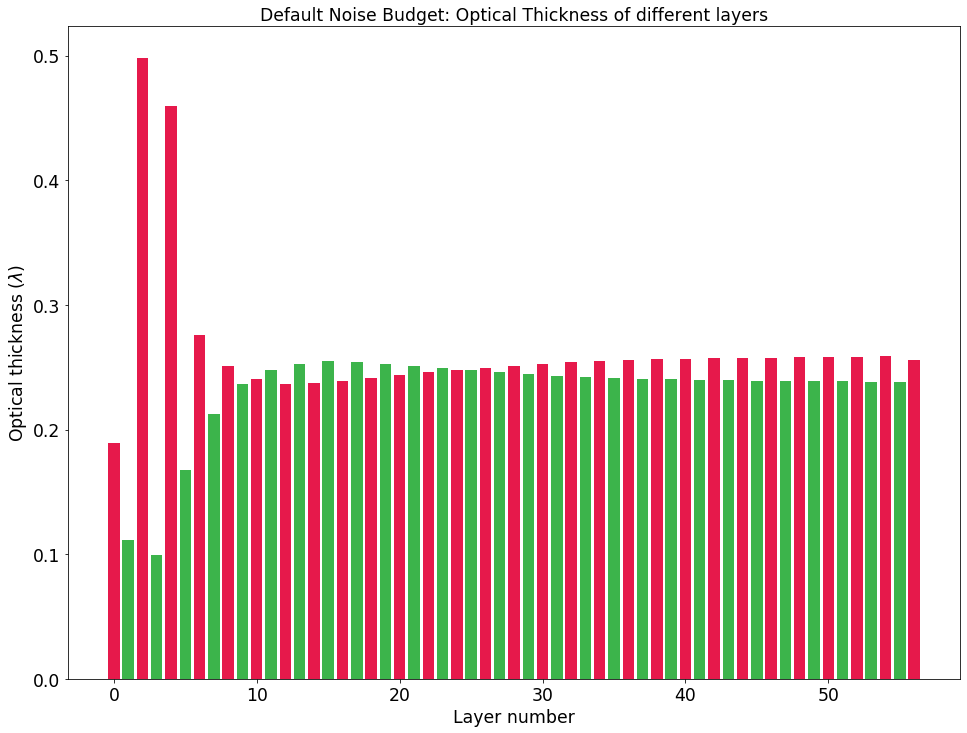

In [5]:
nosbud.plotOptThickProfile();

## Light Amplitufe profile

Amplitude of light penetrating into each layer is also calculated while creating coating stack and can be plotted with  stack.plotLightAmpProfile() function.

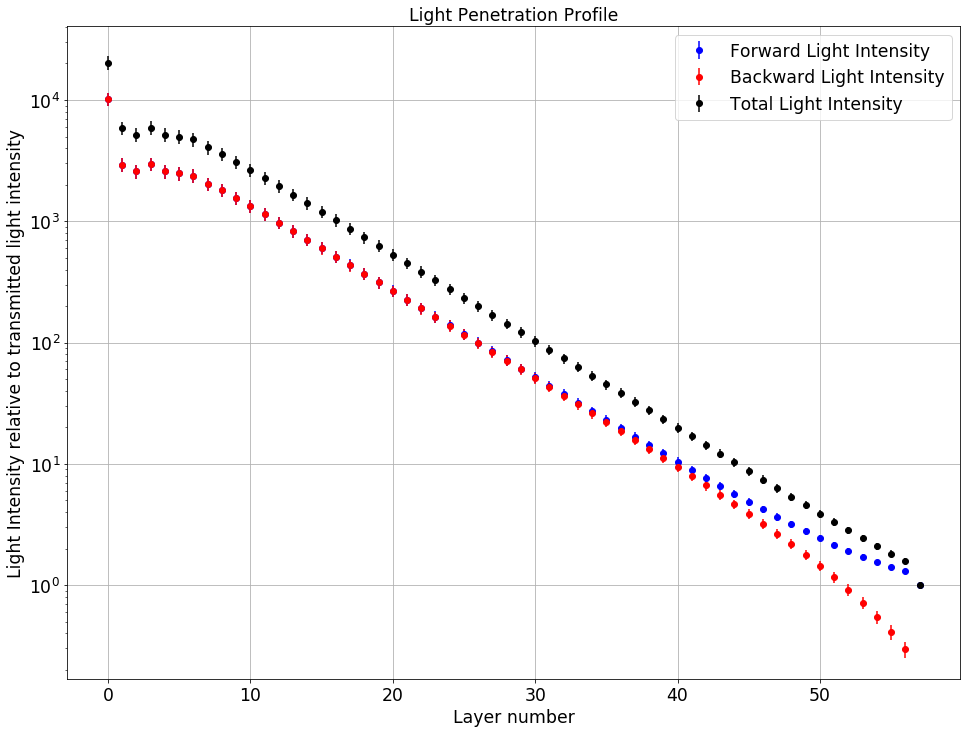

In [6]:
nosbud.coatStack.plotLightAmpProfile();

# Noise Calculations

---

---

## Coating Brownian noise

These calculations follow [Hong et al. PRD 87, 082001 (2013)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)

---
### Function $\epsilon_j(z)$ and TFs
These calculations are done within stack.HongBrownianCoeffCalculations() function which is called automatically upon creation of a stack. Following are some variable details:

|Paper Symbol       |     Code Variable    |       Eq       |      Eq No in Paper|      Desrciption|
|------|------|---------------|---|---|
|<img width=40/>|<img width=80/>|<img width=400/>|<img width=40/>|<img width=400/>|
|$\sigma_j$| stack.Poisson|-|-| Poisson ratio of $j^{th}$ layer.|
|$\sigma_s$| stack.Poisson[-1]|-|-| Poisson ratio of substrate stored as last layer value in stack.Poisson.|
|$Y_j$| stack.Young|-|-| Young's modulus of $j^{th}$ layer.|
|$Y_s$| stack.Young[-1]|-|-| Young's modulus of substrate stored as last layer value in stack.Poisson.|
|$\Phi_j^B$| stack.Loss|-|-| Bulk Loss Angle of $j^{th}$ layer.|
|$\Phi_j^S$| stack.LossShear|-|-| Shear Loss Angle of $j^{th}$ layer.|
|$\lambda_j$| stack.WaveLength|$\frac{\lambda}{n_j}$|-| Wavelenght of light in $j^{th}$ layer| 
|$p_{ij}$|stack.PTE|-|-|Relevant photoelastiv tensor element|
|$\beta_j$|stack.CPE|$-\frac{1}{2}n_j^3 p_{ij}$| (A6)| Coefficient of photoelasticity|
|$\mathrm{A}_{eff}$| stack.Aeff|-|-| Effective beam area on each layer|
|$r_j$| stack.Refl|$\frac{n_{j-1} - n_{j}}{n_{j+1} - n_{j}}$|(97)|     Reflectivity between $(j-1)^{th}$ and $j^{th}$ layer.  Refl[0] being reflectivity between air and 0th layer. Note the difference of 1 in index due to pythons counting of layers from 0 and paper's counting of layers from 1|
|$t_j$| stack.Tran| $\sqrt{1 - r_j^2}$ |  -  |Transmitivity between $(j-1)^{th}$ and $j^{th}$ layer. Tran[0] being transmitivity between air and layer.|
|$\phi_j$| stack.Phi|$d_j  n_j  \frac{2\pi}{\lambda}$|  -   |     Phase change of light traveling in $j^{th}$ layer.|
|$\mathbf{R_{r_{j}}}$ | stack.Rmat | $\frac{1}{t_j}\begin{pmatrix} 1 & -r_j \\ -r_j & 1 \end{pmatrix}$|  (98)   |    Reflection matrix at interface of $(j-1)^{th}$ and $j^{th}$ layer. Rmat[0] is reflection matrix between air and $0^{th}$ layer.|
|$\mathbf{T_{\phi_{j}}}$ | stack.Tmat | $\begin{pmatrix} e^{\mathrm{i}\phi_j} & 0 \\ 0 & e^{-\mathrm{i}\phi_j} \end{pmatrix}$|  (99)   |    Transmission matrix for $j^{th}$ layer.|
|$\mathbf{M_{\phi_{N}}}$ |  | $\mathbf{R_{r_{N+1}} T_{\phi_{N}} R_{r_N} . . . R_{r_1} T_{\phi_0} R_{r_0}}$|  (101)   |    S Matrix for N coating layers.|
|   -    | stack.rEff|  $-\frac{M_{j,21}}{M_{j,22}}$  |  (102)   |   Effective complex reflectivity from top of $j^{th}$ layer. Note that somehow this is different from the values obtained by recursive relations of [Evans et al. PRD 78, 102003 (2008)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)| 
|   $\rho$   | stack.rho|  $-\frac{M_{N,21}}{M_{N,22}}$  |  (102)   |   Effective complex reflectivity of whole stack.|
|$\frac{\partial log(\rho)}{\partial \phi_k}$| stack.delLogRho_delPhik|  $ \frac{2 \mathrm{i} e^{2 \mathrm{i} \phi_k} Det(M_{next}) M_{prev,10} M_{prev,11}}{(e^{2 \mathrm{i} \phi_k} M_{next,01} M_{prev,10} + M_{next,11} M_{prev,11})^2}$| - | $M_{next} = \mathbf{R_{r_{k}} T_{\phi_{k-1}} R_{r_{k-1}} . . . R_{r_1} T_{\phi_0} R_{r_0}}$ <br> $M_{prev} = \mathbf{R_{r_{N+1}} T_{\phi_{N}} R_{r_{N}} . . . R_{r_{k+2}} T_{\phi_{k+1}} R_{r_{k+1}}}$ <br> See coatingReflectivityDerivativesExpressions.nb for derivaitons.|
|   $\rho$   | stack.rho|  $-\frac{M_{N,21}}{M_{N,22}}$  |  (102)   |   Effective complex reflectivity of whole stack.|
|$\frac{\partial log(\rho)}{\partial \phi_k}$| stack.delLogRho_delPhik|  $ -\frac{2 \mathrm{i} e^{2 \mathrm{i} \phi_k} Det(M_{next}) M_{prev,10} M_{prev,11}}{(e^{2 \mathrm{i} \phi_k} M_{next,01} M_{prev,10} + M_{next,11} M_{prev,11})^2}$| - | $M_{next} = \mathbf{R_{r_{k}} T_{\phi_{k-1}} R_{r_{k-1}} . . . R_{r_1} T_{\phi_0} R_{r_0}}$ <br> $M_{prev} = \mathbf{R_{r_{N+1}} T_{\phi_{N}} R_{r_{N}} . . . R_{r_{k+2}} T_{\phi_{k+1}} R_{r_{k+1}}}$ <br> See coatingReflectivityDerivativesExpressions.nb for derivaitons.|
|$\frac{\partial log(\rho)}{\partial r_k}$| stack.delLogRho_delReflk|  $ \frac{Det(M_{next}) ( M_{prev,10}^2 - M_{prev,11}^2)}{(M_{next,11} M_{prev,10} + M_{next,01}M_{prev,11}) r_j  + M_{prev,11} m_{next,11} +  M_{prev,10} M_{next,01} ))^2}$| - | $M_{next} = \mathbf{T_{\phi_{k-1}} R_{r_{k-1}} T_{\phi_{k-2}} . . . R_{r_1} T_{\phi_0} R_{r_0}}$ <br> $M_{prev} = \mathbf{R_{r_{N+1}} T_{\phi_{N}} R_{r_{N}} . . . R_{r_{k+2}} T_{\phi_{k+1}} R_{r_{k+1}} T_{\phi_{k}}}$ <br> See coatingReflectivityDerivativesExpressions.nb for derivaitons.|
| $\epsilon_j(z)$ | stack.epsilon(j,z) | $(n_j + \beta_j) \frac{\partial log(\rho)}{\partial \phi_j} - \beta_j \left[ \frac{1 - r_j^2}{2r_j} \frac{\partial log(\rho)}{\partial \phi_j} - \frac{1 + r_j^2}{2r_j} \frac{\partial log(\rho)}{\partial \phi_{j+1}} \right]cos[2k_0n_j(z-z_{j+1})] -t_j2 \beta_j \frac{\partial log(\rho)}{\partial r_j}sin[2k_0n_j(z-z_{j+1})] $| (25)| A function that accounts for all effects associated with light penetraiton.  |
| $C_j^B$| stack.C_B | $\sqrt{\frac{1+\sigma_j}{2}}$ | Table.1. | Transfer function from bulk noise field to layer thickness.|
| $C_j^{S_A}$| stack.C_SA | $\sqrt{1-2\sigma_j}$ | Table.1. | Transfer function from shear A noise field to layer thickness.|
| $D_j^B$| stack.D_B | $\frac{1-\sigma_s-2\sigma_s^2}{\sqrt{2(1+\sigma_j)}}\frac{Y_j}{Y_s}$ | Table.1. | Transfer function from bulk noise field to surface height.|
| $D_j^{S_A}$| stack.D_SA | $-\frac{1-\sigma_s-2\sigma_s^2}{2\sqrt{1-2\sigma_j}}\frac{Y_j}{Y_s}$ | Table.1. | Transfer function from shear A noise field to surface height.|
| $D_j^{S_B}$| stack.D_SB | $\frac{(\sqrt{3}(1-\sigma_j)(1-\sigma_s-2\sigma_s^2)}{2\sqrt{1-2\sigma_j}(1+\sigma_j)}\frac{Y_j}{Y_s}$ | Table.1. | Transfer function from shear B noise field to surface height.|

----

### Final Coating Brownian Noise calculation

Finally, the phase noise due to coating brownian noise is calculated according to equation (94):
$$ S_{\overline{\xi}} = \sum\limits_j( q_j^B S_j^B + q_j^S S_j^S) $$
where
$$ q_j^B =  \int\limits_{z_{j+1}}^{z_j} \frac{dz}{\lambda_j} \left[ \left[1 - \mathrm{Im}\frac{\epsilon_j(z)}{2} \right] C_j^B + D_j^B \right]^2$$
$$ q_j^S =  \int\limits_{z_{j+1}}^{z_j} \frac{dz}{\lambda_j} \left[ \left[1 - \mathrm{Im}\frac{\epsilon_j(z)}{2} \right] C_j^{S_A} + D_j^{S_A} \right]^2 + [D_j^{S_B}]^2$$
$$ S_j^B = \frac{4 k_B T \lambda_j \Phi_B^j(1 - \sigma_j - 2\sigma_j^2)}{3 \pi f Y_j (1-\sigma_j)^2 \mathrm{A}_{eff}}$$
$$ S_j^S = \frac{4 k_B T \lambda_j \Phi_S^j(1 - \sigma_j - 2\sigma_j^2)}{3 \pi f Y_j (1-\sigma_j)^2 \mathrm{A}_{eff}}$$
This is stored as noiseBudget.S_Xi in the code.
And amplitude noise due to coating brownian noise is calculated according to equation (95):
$$ S_{\overline{\zeta}} = \sum\limits_j( p_j^B S_j^B + p_j^S S_j^S) $$
where
$$ p_j^B =  \int\limits_{z_{j+1}}^{z_j} \frac{dz}{\lambda_j} \left[ C_j^B \mathrm{Re}\frac{\epsilon_j(z)}{2}\right]^2$$
$$ q_j^S =  \int\limits_{z_{j+1}}^{z_j} \frac{dz}{\lambda_j} \left[ C_j^{S_A} \mathrm{Re}\frac{\epsilon_j(z)}{2}\right]^2$$
This is stored as noiseBudget.S_Zeta in the code.

The noises are then converted into frequency PSD and multiplied by number of mirrors. For conversion of amplitude noise into frequency noise, Eq (41) needs to be implemented. Right now this factor is made 0 for fixed mirrors (infinite mass).

The coating brownian noise frequency PSD is stored in noiseBudget.PSDList['coatBr'] and the components via phase and amplitude noise are stored in noiseBudget.PSDList['coatBrPh'] and noiseBudget.PSDList['coatBrAmp'] respectively.

In [7]:
nosbud.calculateCoatingBrownianNoise();

Using Hong et al . PRD 87, 082001 (2013) to calculate coating brownian noise.
Typical calculation time is approximately 14 min.


----

----
## Coating thermo-optic noise
These calculations follow [Evans et al . PRD 78, 102003 (2008)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)

---/
### Thermooptic Coefficients


These calculations are done within stack.EvanThermoOpticCoeffCalculations() function which is called automatically upon creation of a stack.
Following are some variable details:

|Paper Symbol  |     Code Variable    | Eq       |      Eq No in Paper|      Description|
|------|------|---------------|-----|-----|
|<img width=40/>|<img width=80/>|<img width=200/>|<img width=40/>|<img width=400/>|
|$\overline{\alpha_k}$     |stack.CTEeff    | $\alpha\frac{1+\sigma_\mathrm{s}}{1-\sigma}\left[\frac{1+\sigma}{1+\sigma_\mathrm{s}} + (1-2\sigma_\mathrm{s})\frac{E}{E_\mathrm{s}}\right]$|    (A1)       |Effective Coefficient of Thermal Expansion of layer k|
|$\overline{\alpha_c}$     |stack.coatCTE   | $\sum\limits_{k} \alpha_k \frac{d_k}{d}$|    (A2)       |Effective Coefficient of Thermal Expansion of coating|
|$\overline{\alpha_s}$     |stack.subCTE    | $ 2\alpha (1 + \sigma_\mathrm{s})$|    (A1)       |Effective Coefficient of Thermal Expansion of substrate|
|$\overline{\Delta \alpha}$ |stack.delCTE    | $\overline{\alpha_c} - \overline{\alpha_s}\frac{C_\mathrm{c}}{C_\mathrm{s}}$|    (18)       |Effective Coefficient of Thermal Expansion of of mirror|
|$\overline{r_k}$          |stack.ErEff     | $e^{-\mathrm{i}\phi_k} \frac{r_k + \overline{r_{k+1}}}{1+ r_k \overline{r_{k+1}}}$|    (B3)       |Effective reflectivity at k-1 and k layer interface. $\overline{r_N} =e^{-\mathrm{i}\phi_N} r_{N,s}$ |
|$\frac{\partial r_k}{\partial \phi_j} $|stack.delErEff_delPhik| $\begin{cases}e^{-\mathrm{i}\phi_k} \frac{1-r_k2}{(1+r_k\overline{r}_{k+1})^2}\frac{\partial r_{k+1}}{\partial \phi_j}&\text{k<j}\\-\mathrm{i}\overline{r}_k &\text{k=j}\\0 &\text{k>j}\end{cases}$|(B5)|Derivative of reflectivity at k-1,k interface wrt phase shift in jth layer|
|$\frac{\partial \phi_c}{\partial \phi_k} $|stack.delPhic_delPhik| $Im\left[\frac{1}{\overline{r_0}}\frac{\partial \overline{r_0}}{\partial \phi_k} \right]$|(B6)|Derivative of reflection phase of coating wrt phase shift in jth layer|
|$\frac{\partial \phi_k}{\partial T} $|stack.delPhik_delT| $\frac{4 \pi}{\lambda} (\beta_k + \overline{\alpha_k}n_k)d_k$|(B8)|Derivative of phase shift in kth layer wrt T|
|$\frac{\partial \phi_0}{\partial T} $|stack.delPhi0_delT| $\frac{4 \pi}{\lambda} \sum\limits_k \overline{\alpha_k}d_k$|(B8)|Derivative of phase shift due to expansion of whole stack wrt T|
|$\frac{\partial \phi_c}{\partial T} $|stack.delPhic_delT| $\sum\limits_{k=0}^{N} \frac{\partial \phi_c}{\partial \phi_k} \frac{\partial \phi_k}{\partial T}$   |(B7)|Derivative of reflaction phase of coating wrt T|
|$\overline{\beta}$     |stack.coatCTR   | $-\frac{1}{4\pi} \sum\limits_{k=1}^{N} \frac{\partial \phi_c}{\partial \phi_k} \frac{\partial \phi_k}{\partial T}$       |    (derived from B7,B8,B13 & B21)       |Effective Coefficient of Thermo-refractive noise of coating|

---
### Temperature PSD

The profile-weighted temperature fluctuation PSD is
$$ S_T(f) = \frac{2^{3/2} k_\text{B} T^2}{\pi\kappa_\text{s}w}M(f/f_\text{T})$$
with
$$ M(\Omega) = \Re\left[\int\limits_0^\infty\! \mathrm{d}u\, \frac{u\ \mathrm{e}^{-u^2/2}}{\left(u^2-\mathrm{i}\Omega\right)^{1/2}}\right].$$

In code, the variable name is noiseBudget.tempPSD.
Calculation of Temperature PSD in the noisebudget is done by function noiseBudget.temperaturePSD() which is called automatically on calling noiseBudget.calculateCoatingThermoOpticNoise()

---
### Thick coating correction

This follows [Evans et al. PRD 78, 102003 (2008)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003) Eq (39).

Defining $R = \sqrt{\kappa_\text{c} C_\text{c} / \kappa_\text{s} C_\text{s}}$ and $\xi = \sqrt{4\pi f C_\text{c}/\kappa_\text{c}}d$ (using Eq(36) and (41) respectively), we have (39):

$$\begin{align}
    \Gamma_0 &= 2(\sinh\xi - \sin\xi) + 2R(\cosh\xi - \cos\xi) \\
    \Gamma_1 &= 8\sin(\xi/2)\,[r_T \cosh(\xi/2) + \sinh(\xi/2)] \\
    \Gamma_2 &= (1+R^2)\sinh(\xi) + (1-R^2)\sin(\xi) + 2 R \cosh(\xi) \\
    \Gamma_D &= (1+R^2)\cosh(\xi) + (1-R^2)\cos(\xi) + 2 R \sinh(\xi)
\end{align}$$

Then the thick coating correction factor is
$$\Gamma_\text{tc} = \frac{p_\text{E}^2 \Gamma_0 + p_\text{E} p_\text{R} \xi \Gamma_1 + p_\text{R}^2 \xi^2 \Gamma_2}{R\xi^2 \Gamma_D},$$
where (42):
$$p_\text{E} = \frac{\overline{\Delta\alpha}\ d}{\overline{\Delta\alpha}\ d-\beta_\text{c}\lambda} \quad\text{and}\quad
p_\text{R} = \frac{-\beta_\text{c}\lambda}{\overline{\Delta\alpha}\ d-\beta_\text{c}\lambda}.$$

---
### Finally thermo-refractive, thermo-elastic and net thermo-optic noise is calculated:

This is from Eq (4):

$$S_x^{\text{(cTO)}}(f) = \Gamma_\text{tc}S_T(f) \left( \overline{\Delta\alpha} d - \overline{\beta} \right)^2$$

The noises are then converted into frequency PSD and multiplied by number of mirros.

The complete calculation is done by noiseBudget.calculateCoatingThermoOpticNoise() and stored at noiseBudget.PSDList['coatTO']

Also, individual coating thermorefractive and thermoelastic noises are stored at noiseBudget.PSDList['coatTR'] and noiseBudget.PSDList['coatTE'] respectively.


In [8]:
nosbud.calculateCoatingThermoOpticNoise();

Using Evans et al. PRD 78, 102003 (2008) to calculate coating thermo-optic noise.
Calculating temperature PSD...


----

----
## Substrate Brownian Noise

This is calculated using [Cole et al. Nature Photonics 7, 644–650 (2013)](https://www.nature.com/articles/nphoton.2013.174) Eq.1.:

$$S_x^{\text{(sBr)}}(f) = \frac{2 k_\text{B} T}{\pi^{3/2} f} \frac{1-\sigma_\text{s}^2}{w E_\text{s}}\phi_\text{s}$$

This is less by a factor of 2 from expression in paper because the expressions in papers are for 2 mirrors together. We in our calculation take into account number of mirrors separately.

The noise is then converted into frequency PSD and multiplied by number of mirros.

These calculations are done by noiseBudget.calculateSubstrateThermoelasticNoise() and stores at noiseBudget.PSDList['subBr'].

In [9]:
nosbud.calculateSubstrateBrownianNoise();

Using  Cole et al. Nature Photonics 7, 644–650 (2013) Eq.1 to calculate Substrate Brownian Noise.


----

----
## Subtrate Thermoelastic Noise

This is calculated using [Somiya et al. PRD 82, 127101 (2010)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.82.127101) Eq 3 and 8: (Analytical expression for the theory by [Cerdonio et al. PRD 63, 082003 (2001)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.63.082003))

$$ S_x^{\text{(subTE)}}(f) = \frac{4 k_\text{B} T^2}{\pi^{1/2}}
    \frac{\alpha_\text{s}^2 (1+\sigma_\text{s})^2 w}{\kappa_\text{s}}
    J(f/f_\text{T})$$
    
$$ J(\Omega) = -\operatorname{Re}\left\{\frac{\mathrm{e}^{\mathrm{i}\Omega/2}}{\Omega^2} (1 - \mathrm{i}\Omega)\, (\operatorname{Erfcom}\!{\left[\frac{\Omega^{1/2}(1+\mathrm{i})}{2}\right]})\right\} + \frac{1}{\Omega^2} - \frac{1}{(\pi\Omega^3)^{1/2}}$$

where $$f_\text{T} = \frac{1}{2\pi}\frac{\kappa_\text{s}}{C w^2}$$

There is a difference of $\sqrt{2}$ factor from Somiya and Cerdonio's expression because $w$ in Somiya et al. and $r_0$ are related as $r_0 = w/\sqrt{2}$ as explained in [Black et al. PRL 93, 241101 (2004)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.93.241101)

The noise is then converted into frequency PSD and multiplied by number of mirros.

These calculations are done by noiseBudget.calculateSubstrateThermoelasticNoise() and stores at noiseBudget.PSDList['subTE'].

In [10]:
nosbud.calculateSubstrateThermoElasticNoise();

Using Somiya et al. (2010) Eq (3) and (8) to calculate Substrate ThermoElastic Noise.


----

----
## PDH shot noise

Given a visbility $\eta$ and a PDH modulation index $\Gamma$, the PDH shot noise level (in W$^2$/Hz) is
$$ S_P^\text{(PDHshot)} = 2h\nu P_0 \left[J_0(\Gamma)^2 (1-\eta) +3 J_1(\Gamma)^2\right] $$

This is then converted into frequency noise spectral density by using PDH Slope (Also accounting for cavity pole):
$$ S_f^\text{(PDHshot)} = S_P^\text{(PDHshot)} (\frac{1 + \frac{f}{f_p}}{\Gamma^{'}})^2 $$
where $ f_p$ is cavity pole and $\Gamma^{'}$ is PDH slope in W/Hz.

The noise is then multiplied by number of beams.

These calculations are done by noiseBudget.calculatePDHShotNoise() and stores at noiseBudget.PSDList['pdhShot']

In [11]:
nosbud.calculatePDHShotNoise();

----

----
## PLL Oscillation Noise

This noise is directly measured and loaded and hence should be added to noiseBudget.PSDList['pllOsc'] as a list [PSD array , freq array, plot label string]

In [12]:
ff = nosbud.freq

#Start of data loading code
pllOscFreq, pllOscASD = np.loadtxt('../../Data/PLLOscNoise_1kHz.txt', unpack=1)
pllOscPSD = np.interp(ff, pllOscFreq, pllOscASD**2)
pllOscPSD = unp.uarray(pllOscPSD, pllOscPSD/50**0.5)
#End of data laoding code

nosbud.PSDList['pllOsc'] = [pllOscPSD, ff, 'PLL Oscillation Noise @ 1 kHz/V' ]

----

----
## PLL Readout Noise

This noise also needs to be added to noiseBudget.PSDList['pllReadout'] as a list [PSD array , freq array, plot label string]

In [13]:
ff = nosbud.freq
#Start of calculation code
# Magic number from Tara's old noise budget; somehow connected to elog 2012-02-09
pllReadPSD = (ff*0.0207*5.04e-5)**2
pllReadPSD = unp.uarray(pllReadPSD, pllReadPSD/50**0.5)
#End of calculation code

nosbud.PSDList['pllReadout'] = [pllReadPSD, ff, 'PLL Electronic Reaodut Noise' ]

----

----
## Seismic Noise

Seismic data is measured and its effect on frequency noise is calculated using meachnical transfer function and coupling witht he cavity.

Due to open nature of these calculations, they are not part of the class function but once calculated outside, they should be added to noiseBudget.PSDList['seismic'] as a list [PSD array , freq array, plot label string]
 
See example below.

In [14]:
ff = nosbud.freq
cavLen = nosbud.cavLen
fConv = nosbud.fConv

# Start of data loading and calculation code.
import scipy.io as scio
def mechTF(ff, f0, Q):
    return 1/(1+1j*ff/(f0*Q)-(ff/f0)**2)
seisData = scio.loadmat('../../Data/psl_seis_2011_10_05.mat') # from a Guralp
seisFreq, seisVel = seisData['f_ver'][:,0], seisData['uf_ver'][:,2] # unfloated vertical velocity, m/(s * Hz**0.5)
seisAcc = np.interp(ff, seisFreq, seisVel * 2*np.pi*seisFreq)
fStack1 = 10.7 # Hz
QStack1 = 15
fStack2 = 35.4 # Hz
QStack2 = 8
fSpring = 5.2 # Hz
QSpring = 10
stackTF = mechTF(ff, fStack1, QStack1) * mechTF(ff, fStack2, QStack2)
springTF = mechTF(ff, fSpring, QSpring)
seisTF = stackTF*springTF
seisCouple = 6e-12 * cavLen # m / (m s**-2)
seismicPSD = (seisAcc * np.abs(seisTF))**2
seismicPSD = unp.uarray(seismicPSD, seismicPSD/50**0.5) * seisCouple**2 * fConv**2 # Hz/sqrt(Hz)
# End of data loading and calculation code

nosbud.PSDList['seismic'] = [seismicPSD, ff, 'Seismic Noise' ]

----

----
## Photothermal Noise
These calculations follow [Farsi et al . JoAPh 111, 043101 (2012)](https://aip.scitation.org/doi/10.1063/1.3684626)

----
### Coupling relations

Incident power noise gets converted into frequency noise through photothermal transfer function. This transfer function couples noise PSD in laser power to mirror displacement noise PSD:
\begin{equation}
    S_x^{photoThermal}(f) = |H(f)|^2 P^2_{abs} S_{RIN} 
\end{equation}
where H(f) is the complex photothermal transfer function for a mirror, P_{abs} is power absorbed by the mirror and S_{RIN} is laser beams RIN PSD.

The photothermal transfer function can be broken down into three contributions Eq. A51:
\begin{equation}
    H(f) = H_\text{c}(f) + H_\text{s}(f) + H_\text{tr}(f).
\end{equation}
where subscripts c,s and tr stand for coating, substrate and thermorefractive contributions respectively.

In what follows, $r_0$ is the radius satisfying $I(r_0) = I_0/\mathrm{e}$ (so $w = \sqrt{2}r_0$). Also, 'self' refers to noiseBudget object.

---

### Coating contribution

Coating contribution is calculated by Eq. A44:

\begin{equation}
    H_\text{c}(f) = \frac{\alpha_\text{c}}{\pi\kappa_\text{c}}
        \frac{f_\text{c}}{\mathrm{i}f}
        \int\limits_0^\infty \mathrm{d}\xi \, \xi \, \mathrm{e}^{-\xi^2/2} \,
        F(\xi) \,
        \left[\gamma_1 G_1(\xi) - \gamma_2 \frac{\xi}{\xi_\text{c}} G_2(\xi) \right],
\end{equation}
where

|Paper Symbol  |     Code Variable    | Eq / description |
|------|------|------|
|<img width=40/>|<img width=80/>|<img width=600/>|
|$r_0$| self.PTr0 |$ r_0 = \frac{w}{\sqrt{2}}$|
|$k_\perp$| - | Wavevector for perperdicular displacement in mirror.|
|$\xi$  |- |$\xi = k_\perp r_0 $. Integration variable.|
|$G_1(\xi)$|self.PTG1func(xi,f)|$    G_1(\xi) = \cosh(\xi d/r_0) + \mathcal{R}\frac{\xi}{\xi_\text{c}}\sinh(\xi d/r_0)- \cosh(\xi_\text{c} d/r_0) - \mathcal{R}\sinh(\xi_\text{c} d/r_0)$|
|$G_2(\xi)$|self.PTG2func(xi,f)|$G_2(\xi) = \mathcal{R} \cosh(\xi d/r_0) + \frac{\xi_\text{c}}{\xi} \sinh(\xi d/r_0) - \mathcal{R} \cosh(\xi_\text{c} d/r_0) - \sinh(\xi_\text{c} d/r_0)$|
|$  \xi_c  $| self.PTxiCoat(xi,f)    |$\xi_c  =  \left(\frac{\mathrm{i}f}{f_c} + \xi^2\right)^{1/2} $|
|$  \xi_s  $| self.PTxiSub(xi,f)    |$\xi_s  =  \left(\frac{\mathrm{i}f}{f_s} + \xi^2\right)^{1/2} $|
|$  f_c  $| self.PTf_c    |$   f_c  =  \frac{\kappa_c}{\pi C_c w^2} = \frac{\kappa_c}{2\pi C_c r_0^2} $|
|$  f_s  $| self.PTf_s    |$   f_s  =  \frac{\kappa_s}{\pi C_s w^2} = \frac{\kappa_s}{2\pi C_s r_0^2} $|
|$  F(\xi) $| self.PTFfunc(xi,f)    |$   F(\xi)  =  \left[\cosh(\xi_\text{c} d/r_0) + \mathcal{R} \sinh(\xi_\text{c} d/r_0)\right]^{-1} $|
|$  \gamma_1 $| self.PTgamma1(xi,f)    |$   \gamma_1 \simeq \frac{1}{2}\,\frac{1+\sigma_\text{c}}{1-\sigma_\text{c}}
       \left[ 1 + (1-2\sigma_\text{s}) \frac{1+\sigma_\text{s}}{1+\sigma_\text{c}}\,
           \frac{E_\text{c}}{E_\text{s}}\right] $|
|$  \gamma_2 $| self.PTgamma2(xi,f)    |$   \gamma_2 \simeq \frac{1-\sigma_\text{s}^{\,2}}{1-\sigma_\text{c}} \,
       \frac{E_\text{c}}{E_\text{s}} $|
|$  \mathcal{R} $| self.PTfancyR(xi,f)    |$   \mathcal{R}  =  \frac{\kappa_\text{c}\bigl(k_\text{c}^2 + k_\perp^2\bigr)^{1/2}}{\kappa_\text{s}\bigl(k_\text{s}^2 + k_\perp^2\bigr)^{1/2}} = \frac{\kappa_\text{c}\bigl(r_0^2 k_\text{c}^2 + \xi^2\bigr)^{1/2}}{\kappa_\text{s}\bigl(r_0^2 k_\text{s}^2 + \xi^2\bigr)^{1/2}} $|
|$  k_c $| self.PTkCoat(f)    |$   k_c  =  \left(2\pi\mathrm{i} f C_c/\kappa_c\right)^{1/2} $|
|$  k_s $| self.PTkSub(f)    |$   k_s  =  \left(2\pi\mathrm{i} f C_s/\kappa_s\right)^{1/2} $|
| -      | self.PTintegrand_c(xi,f)|$ \xi \, \mathrm{e}^{-\xi^2/2} \, F(\xi) \,\left[\gamma_1 G_1(\xi) - \gamma_2 \frac{\xi}{\xi_\text{c}} G_2(\xi) \right]$|
|$\frac{X_c(f)}{P_\text{abs}(f)}$ (here $H_\text{c}(f)$ )| self.PTCoatTF | Photothermal transfer function due to coating.| 

---

### Substrate contribution

Substrate contribution is calculated by Eq. A45:
\begin{equation}
    H_\text{s}(f) = -\frac{\alpha_\text{s}(1+\sigma_\text{s})}{\pi\kappa_\text{s}} \frac{f_\text{s}}{\mathrm{i}f}
        \int\limits_0^\infty \mathrm{d}\xi \, F(\xi) \,
       (1-\xi/\xi_\text{s}) \, \xi \, \mathrm{e}^{-\xi^2/2}
\end{equation}
where most functions are as described above.

|Paper Symbol  |     Code Variable    | Eq / description |
|------|------|------|
|<img width=40/>|<img width=80/>|<img width=600/>|
| -      | self.PTintegrand_s(xi,f)|$ F(\xi) \, (1-\xi/\xi_\text{s}) \, \xi \, \mathrm{e}^{-\xi^2/2}$|
|$ \frac{X_s(f)}{P_\text{abs}(f)}$ (here $H_\text{s}(f)$ )| self.PTSubTF | Photothermal transfer function due to substrate.| 

---

### Thermorefractive contribution

Thermorefractive contribution is calculated by Eq. A49:
\begin{equation}
    H_\text{tr}(f) = \frac{\lambda_0 \beta_\text{c}}{2\pi\kappa_\text{c}r_0}
        \int\limits_0^\infty \mathrm{d}\xi\, \frac{\xi\,\mathrm{e}^{-\xi^2/2}}{\xi_\text{c}}\,
        \frac{\sinh(\xi_\text{c} d/r_0) + \mathcal{R}\cosh(\xi_\text{c} d/r_0)}{\cosh(\xi_\text{c} d/r_0) + \mathcal{R}\sinh(\xi_\text{c} d/r_0)}
\end{equation}
where most functions are as described above.

|Paper Symbol  |     Code Variable    | Eq / description |
|------|------|-------|
|<img width=40/>|<img width=80/>|<img width=600/>|
| -      | self.PTintegrand_tr(xi,f)|$ \frac{\xi\,\mathrm{e}^{-\xi^2/2}}{\xi_\text{c}}\, \frac{\sinh(\xi_\text{c} d/r_0) + \mathcal{R}\cosh(\xi_\text{c} d/r_0)}{\cosh(\xi_\text{c} d/r_0) + \mathcal{R}\sinh(\xi_\text{c} d/r_0)}$|
|$ \frac{X_{tr}(f)}{P_\text{abs}(f)}$ (here $H_\text{tr}(f)$ )| self.PTtrTF | Photothermal transfer function due to thermorefractive effect.|

---

### Total TF and total noise calculation

Total transfer function is calculated by summing the above three transfer functions and is stored at self.PTTF.

Absorbed power is calculated by $P_{abs} = \mathrm{A} P_{circ}$ where $\mathrm{A}$ is coating absorptivity and $P_{circ}$ is circulating power in cavity.

These calculations are done by noiseBudget.calculatePhotoThermalNoise(RINfiles, coatAbs) function. It requires two arguments:
* RINfiles : A list of file names containing RIN data for each beam
* coatAbs : A list of coating absorptivity values for each beam. If only one value is provided, it is used for all beams

The RIN data is read and interpolated at the frequency points of noisebudget.freq . Then total photothermal noise is calculated for each beam by:
\begin{equation}
    S_{f}^{PSD} = S_{RIN} P^2_{abs} | H_{total}|^2 f^2_{conv}
\end{equation}
and all the beams are added in quadrature to get total photothermal noise in units of $Hz/\sqrt{Hz}$ and saved at noiseBudget.PSDList['photoThermal'].

In [15]:
RINfiles = ['../../Data/RINsouth.txt','../../Data/RINsouth.txt'] #Using RIN of south for both.
coatAbs = uf(6,1)*1e-6   #From previous notebook
nosbud.calculatePhotoThermalNoise(RINfiles, coatAbs);

Using Farsi et al . JoAPh 111, 043101 (2012) to calculate  Photothermal noise.
Wait 1 to 2 minutes ...


----

----
## Residual NPRO frequency noise

We need a true free-running frequency noise measurement. 
So far, we have been assuming a frequency noise with ASD $\sqrt{S_{\nu}(f)} = (10^4 \text{ Hz/Hz}^{-1/2})\times(1 \text{ Hz}/f)$.
which is taken from [Wilke et al. Opt. Lett. 25, 14 1019-1021 (2000)](https://www.osapublishing.org/ol/abstract.cfm?uri=ol-25-14-1019).

Open Loop Transfer Function of FSS are measured and the measurements are fitted with model transfer functions to get zeros and poles which are then used to estimate OLTF at frequency points of interest.

The assumed (or measured) NPRO free-running noise is then suppressed by these OLTFs and added in quadrature.

Due to open nature of these calculations, they are not part of the class function but once calculated outside, they should be added to noiseBudget.PSDList['resNPRO'] as a list [PSD array , freq array, plot label string]
 
See example below.

In [16]:
ff = nosbud.freq

# Start of data loading and calculation code.
import json
import scipy.signal
# NPRO free-running frequency noise ASD: Willke et al., Opt. Lett. vol 25 no 14
# PDH OLTFs: ctn:1504
nproFreeASD = 10**4/ff # Hz/Hz**0.5
# Load vector-fitted versions of PDH OLTF data
with open('../../Data/pdhNorthLTI.json', 'r') as fnorth:
    pdhNorthDict = json.load(fnorth)
with open('../../Data/pdhSouthLTI.json', 'r') as fsouth:
    pdhSouthDict = json.load(fsouth)
pdhNorthZpk = (np.array(pdhNorthDict['zeros.real'])+1j*np.array(pdhNorthDict['zeros.imag']),
               np.array(pdhNorthDict['poles.real'])+1j*np.array(pdhNorthDict['poles.imag']),
               pdhNorthDict['gain.real']+1j*pdhNorthDict['gain.imag'])
pdhSouthZpk = (np.array(pdhSouthDict['zeros.real'])+1j*np.array(pdhSouthDict['zeros.imag']),
               np.array(pdhSouthDict['poles.real'])+1j*np.array(pdhSouthDict['poles.imag']),
               pdhSouthDict['gain.real']+1j*pdhSouthDict['gain.imag'])
pdhNorthLTI = scipy.signal.lti(*pdhNorthZpk)
pdhSouthLTI = scipy.signal.lti(*pdhSouthZpk)
_, pdhNorthMag, pdhNorthPha = pdhNorthLTI.bode(w=2*np.pi*ff)
_, pdhSouthMag, pdhSouthPha = pdhSouthLTI.bode(w=2*np.pi*ff)
pdhNorthMag = 10**(pdhNorthMag/20)
pdhSouthMag = 10**(pdhSouthMag/20)
northResidFreqPSD = (nproFreeASD / pdhNorthMag)**2
southResidFreqPSD = (nproFreeASD / pdhSouthMag)**2
residFreqPSD = northResidFreqPSD + southResidFreqPSD
# End of data loading and calculation code

nosbud.PSDList['resNPRO'] = [residFreqPSD , ff, 'Residual NPRO noise'];

----

----
## Adding Beat Note Spectrum Measurements

Any beat note spectrum measurement can be loaded to the noiseBudget object as a list in the following format:

noiseBudget.PSDList['some_key'] = [ PSDArray , FreqArray , 'PlotLabel']

In [17]:
BNdata = np.loadtxt('../../../ctn_labdata/data/20190103_BeatNoteSpectrum_Wideband_Detector/Jan03_2019_BNnoise__MedianData.txt')
Jan0319Freq = BNdata[:,0]
Jan0319PSD = BNdata[:,1]
'''
Use this format if you have uncertainity information.
Jan0319PSD = np.zeros(len(Jan0319Freq))*uf(0,0)
for ii in range(len(Jan0319Freq)):
    Jan0319PSD[ii] = uf(BNdata[ii,1],BNdata[ii,2])
'''

nosbud.PSDList['Jan0319BN'] = [Jan0319PSD , Jan0319Freq, 'Jan 03 2019 Beat'];

---

---

# Plotting the noise budget

All the calculated PSDs are stored in noiseBudget.PSDList. A dictionary with each element having a list of format [ Frequencies, PSD, Legend].

One can add more PSDs from outside into this dictionary. This will be useful to add the measured PSD in the list.

Finally, you need to call noiseBudget.plotPSD() to get the noisebudget. The arguments mean following:

|Argument|Format|Default| Meaning|
|---|---|---|---|
|plotList|List of strings|['coatBr', 'coatTO','subBr','subTE','pdhShot','pllOsc','pllReadout','seismic','photoThermal','resNPRO']|List of keys of noiseBudget.PSDList to plot.|
|title| string |'Noise budget for two 3.68-cm cavities with GaAs/Al$_{0.92}$Ga$_{0.08}$As Bragg mirrors'|Title on the plot.|
|filename| string|None| If provided, the figure will be saved with this file name.|
|doTotal| boolean|True| If true, total of calculated PSDs is added to noiseBudget.PSDList as the total expected noise and plotted|
|\*\*kwargs|  -   | -   | Any arguments (color, linestyle, label, etc.) to pass to the plot|

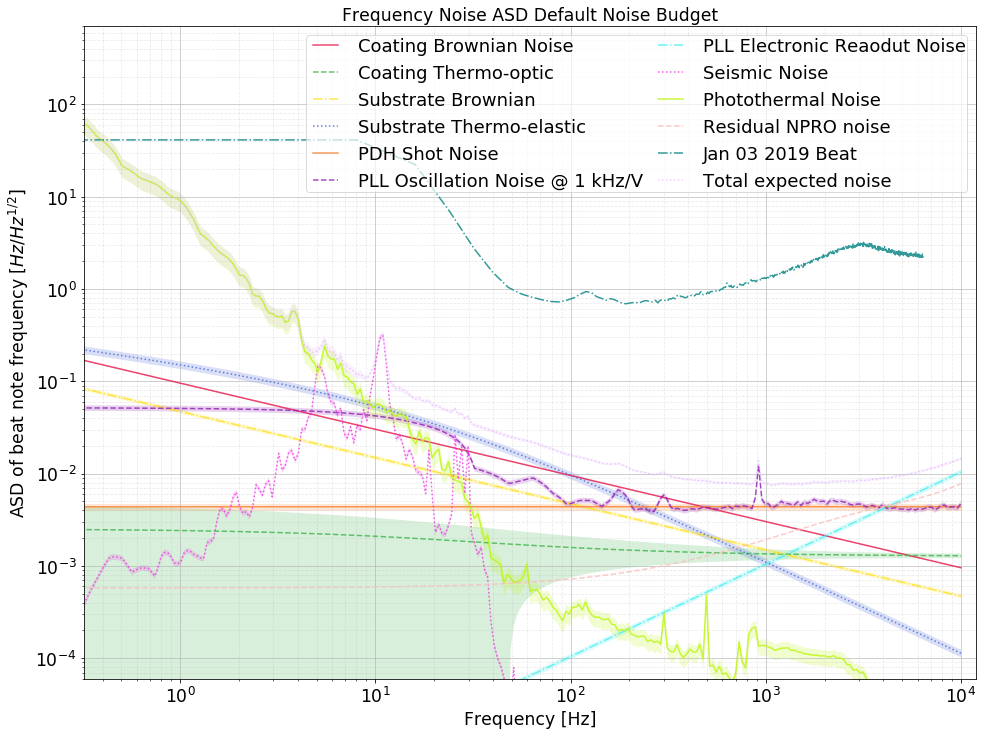

In [18]:
toPlot = ['coatBr', 'coatTO', 'subBr', 'subTE', 'pdhShot', 'pllOsc', 'pllReadout', 'seismic', 'photoThermal', 'resNPRO', 'Jan0319BN', 'total']
nosbud.plotPSD(plotList=toPlot, filename = 'TrialNoiseBudgetPlot.pdf');

---

## Checking out some other features

Object attributes can be accessed to plot and see if code ran fine.

See example of plotting photothermal transfer functions and 

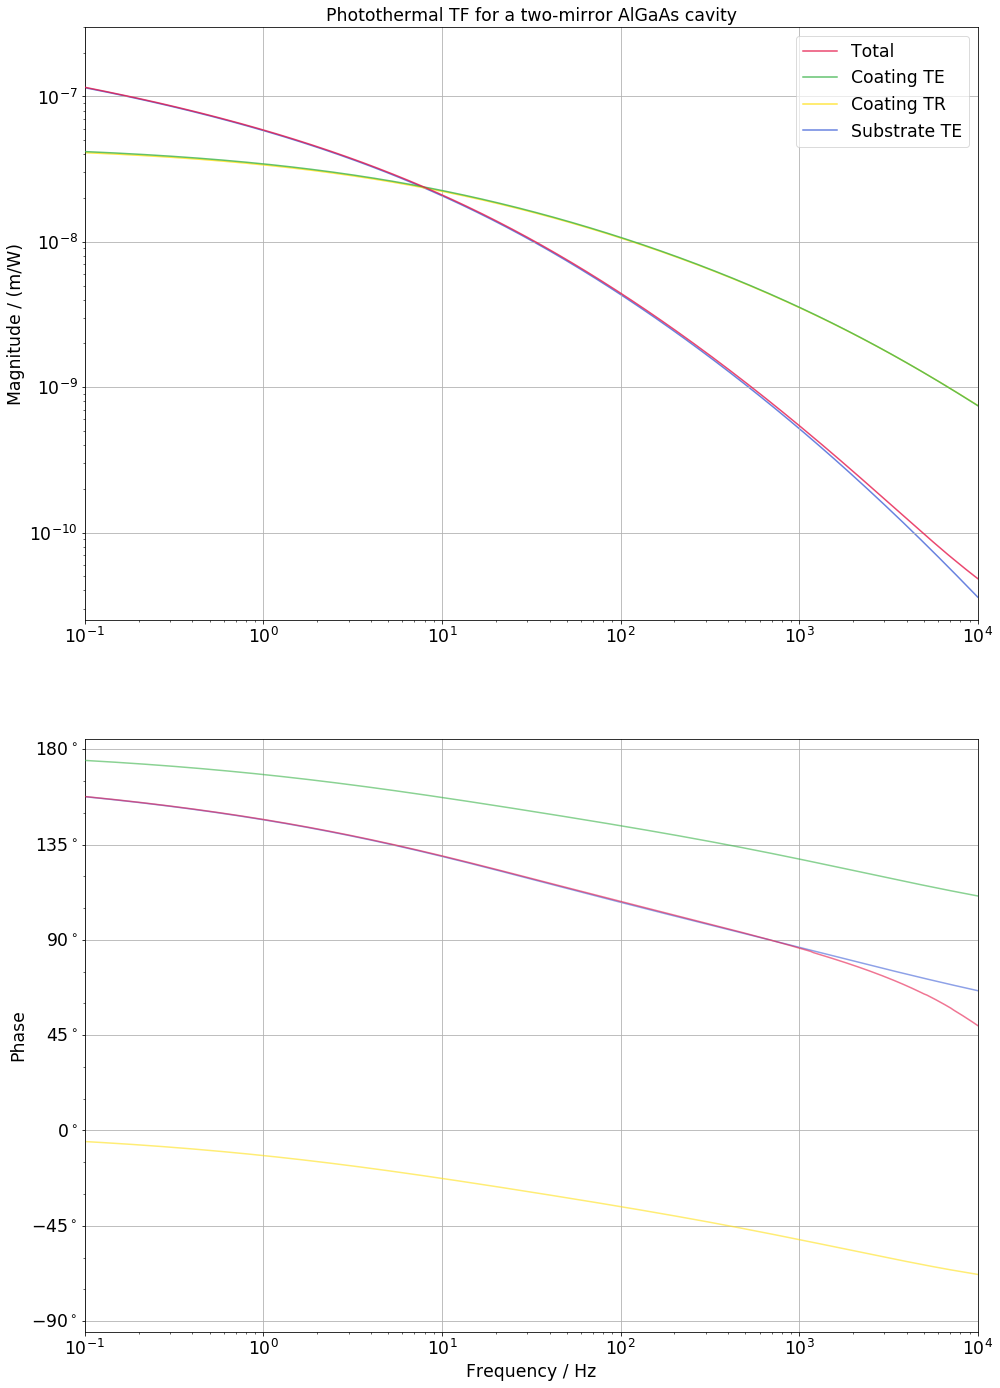

In [19]:
import matplotlib.pyplot as plt
cList = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                 '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                 '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
                 '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
                 '#ffffff', '#000000']
PTList = [nosbud.PTTF, nosbud.PTCoatTF, nosbud.PTtrTF, nosbud.PTSubTF]
PTLabels = ['Total', 'Coating TE', 'Coating TR', 'Substrate TE']
hPT = plt.figure(figsize=(16, 24))
axMag = hPT.add_subplot(211)
axPha = hPT.add_subplot(212, sharex=axMag)
for ii, trace in enumerate(PTList):
    axMag.loglog(nosbud.freq, np.abs(trace),
                 c=cList[ii], label=PTLabels[ii], alpha=0.8, zorder=len(PTList)-ii)
    axPha.semilogx(nosbud.freq, np.angle(trace, deg=True),
                   c=cList[ii], alpha=0.6, zorder=len(PTList)-ii)
axMag.set_ylabel('Magnitude / (m/W)')
axMag.set_title(r'Photothermal TF for a two-mirror AlGaAs cavity')
axMag.set_xlim(0.1, 1e4)
axMag.set_ylim(2.5e-11, 3e-7)
axMag.legend(loc='best', framealpha=0.7)
axMag.grid(which='major', linestyle='solid')
axPha.set_xlabel('Frequency / Hz')
axPha.set_ylabel('Phase')
phaticks = np.arange(-180, 181, 45)
axPha.set_yticks(phaticks)
axPha.set_yticks(np.arange(-180, 181, 15), minor=True)
axPha.set_yticklabels(['${:.0f}^\circ$'.format(tick) for tick in phaticks])
axPha.set_ylim(-95, 185)
axPha.grid(which='major', linestyle='solid')

Text(0.5, 1.0, 'Checking parameters in Evans et al. calculations.')

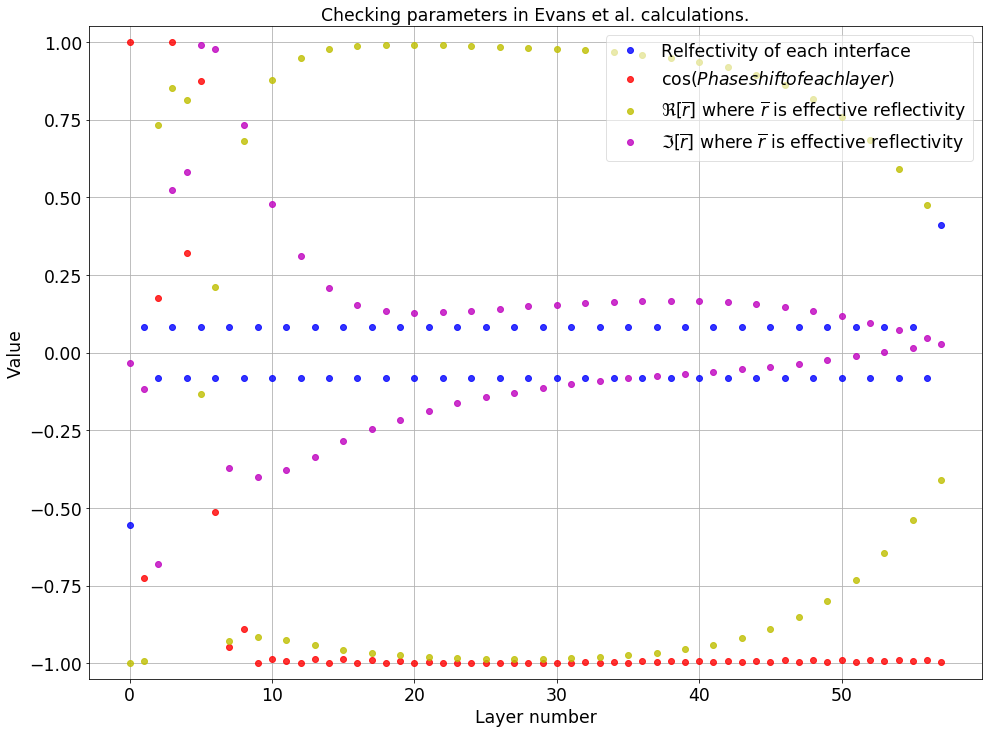

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,12))
plt.plot(unp.nominal_values(nosbud.coatStack.Refl), 'bo', alpha=0.8, label=r'Relfectivity of each interface')
plt.plot(np.concatenate([[np.cos(0)],unp.nominal_values(unp.cos(2*nosbud.coatStack.Phi[:-1]))]), 'ro', alpha=0.8, label=r'$\cos(Phase shift of each layer)$')
plt.plot(unp.nominal_values([ x.real() for x in nosbud.coatStack.ErEff]), 'yo', alpha=0.8, label=r'$\Re[\overline{r}]$ where $\overline{r}$ is effective reflectivity')
plt.plot(unp.nominal_values([ x.imag() for x in nosbud.coatStack.ErEff]), 'mo', alpha=0.8, label=r'$\Im[\overline{r}]$ where $\overline{r}$ is effective reflectivity')
plt.grid()
plt.ylim(-1.05, 1.05)
plt.legend(numpoints=1, framealpha=0.6)
plt.xlabel('Layer number')
plt.ylabel('Value')
plt.gca().set_title('Checking parameters in Evans et al. calculations.')

---

---

# Code Variables Index

Attributed of all classes can be accessed from outside and manipulated if need be. Here, I give list of all attributes of all classes for reference:

---

### noiseBudget class has following attributes:

| Attribute | Data Type | Meaning |
|------|------|------|
|<img width=900/>|<img width=400/>|<img width=1200/>|
|	Name	|	String	|	Name of Noise Budget	|	
|	temp	|	ufloat	|	Temperature of Experiment	|	
|	cavLen	|	ufloat	|	Cavity Len (m)	|	
|	lam	|	ufloat	|	Wavelength (m)	|	
|	pdhModInd	|	ufloat	|	PDG Modulation Index of FSS	|	
|	cavVis	|	ufloat	|	Cavity Fringe Visibility	|	
|	finesse	|	ufloat	|	Finesse of cavity	|	
|	roc	|	ufloat	|	Radius of Curvature of cavity mirros (m)	|	
|	mirRad	|	ufloat	|	Mirror Radius (Size) (m)	|	
|	nom	|	int	|	Number of mirros in experiment.	|	
|	nob	|	int	|	Number of beams in experiment	|	
|	sub	|	materials	|	Substrate materials Object	|	
|	evenCL	|	materials	|	Even Coating Layers materials object	|	
|	oddCL	|	materials	|	Odd Coating Layers materials object	|	
|	structure	|	None, String or Dict	|	Struture parameter for definiting coating stack.	|	
|	nol	|	int	|	Number of layers	|	
|	freq	|	float	|	Frequency axis of noise budget.	|	
|	qwl	|	Boolean	|	Whether quarter wavelength thickness of layers is assumed.	|	
|	coatStack	|	stack	|	Coating stack object.	|	
|	fsr	|	ufloat	|	Free Spectral Range of cavities. (Hz)	|	
|	cavPole	|	ufloat	|	Cavity Pole (Hz)	|	
|	pdhSlope	|	ufloat	|	PDH Slope of FSS (W/Hz)	|	
|	fConv	|	ufloat	|	Conversion factor from displacement to frequency (Hz/m)	|	
|	spotSize	|	ufloat	|	Spot size of beam on mirrors (m)	|	
|	beamWaist	|	ufloat	|	Beam Waist radius (m)	|	
|	fTherm	|	ufloat	|	Thermal relaxation frequency (Hz)	|	
|	circPower	|	ufloat	|	Circulating power in cavities (W):	|	
|	PSDList	|	Dict	|	All frequency PSD traces will be stored in this directory as [PSD, freq, 'Legend']	|	
|	tempPSD	|	np.array of ufloat	|	Temperature PSD	|	
|	calcPSDList	|	List	|	List of calculated noises to be sumed for expected noise	|	
|	showParams	|	function	|	Shows all parameters of noiseBudget object.	|	
|	writeParams	|	function	|	Write all parameters of noiseBudget to a recallable file for object creation.	|	
|	temperaturePSD	|	function	|	This function calculates PSD of temperature to be used for coating ThermoOptic noise calculation.	|	
|	calculateCoatingBrownianNoise	|	function	|	This function calculates Coating ThermoOptic noise using [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001).  See stack.HongBrownianCoeffCalculations() in materials.py for associated parameter calculations.	|	
|	q_Bk	|	np.array of ufloat	|	$q^B_j$ of Eq 94 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	q_Sk	|	np.array of ufloat	|	$q^S_j$ of Eq 94 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	S_Xi	|	np.array of ufloat	|	$S_{\overline{\xi}}$ of Eq 94 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	p_Bl	|	np.array of ufloat	|	$p^B_j$ of Eq 95 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	p_Sk	|	np.array of ufloat	|	$p^S_j$ of Eq 95 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	S_Zeta	|	np.array of ufloat	|	$S_{\overline{\zeta}}$ of Eq 95 in [Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|	
|	calculateCoatingThermoOpticNoise	|	function	|	This function calculates Coating ThermoOptic noise using [Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003).  See stack.EvanThermoOpticCoeffCalculations() in stack.py for associated parameter calculations.	|	
|	GammaTC	|	ufloat	|	Thick Coating Correction factor in Coating ThermoOptic Noise	|	
|	calculateSubstrateBrownianNoise	|	function	|	This function calculates Substrate Brownian Noise Using [Cole et al.](https://www.nature.com/articles/nphoton.2013.174)	|	
|	calculateSubstrateThermoElasticNoise	|	function	|	This function calculates Substrate ThermoElastic Noise Using [Somiya et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.82.127101)	|	
|	calculatePDHShotNoise	|	function	|	This function calculates PDH shot noise for given visiblity and PDH modulation index.	|	
|	calculatePhotoThermalNoise	|	function	|	This function calculated Photothermal noise in the mirrors using [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|	
|	PTgamma1	|	ufloat	|	$\gamma_1$ in Eq. A43 	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTgamma2	|	ufloat	|	$\gamma_2$ in Eq. A43	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTr_0	|	ufloat	|	$r_0$ is the radius satisfying $I(r_0) = I_0/\mathrm{e}$ (so $w = \sqrt{2}r_0$)		|
|	PTf_c	|	ufloat	|	$\omega_c$ 	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTf_s	|	ufloat	|	$\omega_s$ 	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTkCoat	|	function	|	$k_c$	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTkSub	|	function	|	$k_s$	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTfancyR	|	function	|	$\mathcal{R}$ in Eq A13	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTxiCoat	|	function	|	$\xi_c$ in Eq A46	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTxiSub	|	function	|	$\xi_s$ in Eq A47	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTFfunc	|	function	|	F function in Eq. A47	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTG1func	|	function	|	Functional term in Eq. A44	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTG2func	|	function	|	Functional term in Eq. A44	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTintegrand_c	|	function	|	Integrand function for coating contribution in Eq A44	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTintegrand_cReal	|	function	|	Real part of noiseBudget.Ptintegrand_c		|
|	PTintegrand_cImag	|	function	|	Imaginary part of noiseBudget.Ptintegrand_c		|
|	PTintegrand_s	|	function	|	Integrand function for substrate contribution in Eq A45	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTintegrand_sReal	|	function	|	Real part of noiseBudget.Ptintegrand_s		|
|	PTintegrand_sImag	|	function	|	Imaginary part of noiseBudget.Ptintegrand_s		|
|	PTintegrand_tr	|	function	|	Integrand function for thermorefractive contribution in Eq A45	of [Farsi et al.](https://aip.scitation.org/doi/10.1063/1.3684626)	|
|	PTintegrand_trReal	|	function	|	Real part of noiseBudget.Ptintegrand_tr		|
|	PTintegrand_trImag	|	function	|	Imaginary part of noiseBudget.Ptintegrand_tr		|
|	PTCoatTF	|	np.array of ufloat	|	Photothermal Transfer function due to Coating [TE]		|
|	PTSubTF	|	np.array of ufloat	|	Photothermal Transfer function due to Substrate		|
|	PTtrTF	|	np.array of ufloat	|	Photothermal Transfer function due to Thermorefractive effect		|
|	PTTF	|	np.array of ufloat	|	Total Photothermal Transfer Function.		|
|	absPower	|	np.array of ufloat	|	Absored Power in mirrors (W)		|
|	PT_PSD	|	2-Dim np.array of ufloat	|	2- dim array with each column carrying photothermal noise due to respective beam.		|
|	plotOptThickProfile	|	function	|	This function plots Optical Thickness profile of the coating layer.	|	
|	plotPSD	|	function	|	This function plots the PSDs from the PSDList.	|	
|	showCode	|	function	|	This function prints out the code of the funcName function argument.	|

---

### materials class has following attributes:


| Attribute | Data Type | Meaning |
|------|------|------|
|<img width=900/>|<img width=400/>|<img width=1200/>|
|	Name	|	String	|	Name of material	|
|	Thick	|	ufloat	|	Thickness of material (m)	|
|	Young	|	ufloat	|	Young's Modulus (Pa)	|
|	Poisson	|	ufloat	|	Poisson's Ratio	|
|	Loss	|	ufloat	|	Bulk Loss Angle (rad)	|
|	LossShear	|	ufloat	|	Shear Loss Angle (rad)	|
|	Cond	|	ufloat	|	Heat Conductivity ($W/(m \,K)$)	|
|	HeatCap	|	ufloat	|	Heat Capacity per unit Volume ($J/(K \,m^3)$)	|
|	RefInd	|	ufloat	|	Refractive Index	|
|	CTE	|	ufloat	|	Coefficient of Thermal Expansion (1/K)	|
|	CTR	|	ufloat	|	Coefficient of Thermorefractive effect (1/K)	|
|	PET	|	ufloat	|	Relevant photoelastic tensor component	|
|	showParams	|	function	|	Shows all parameters of materials object.	|
|	writeParams	|	function	|	Write all parameters of materials to a recallable file for object creation.	|
|	showCode	|	function	|	This function prints out the code of the funcName function argument.	|

---

### stack class has following attributes:


| Attribute | Data Type | Meaning |
|------|------|------|
|<img width=900/>|<img width=400/>|<img width=1200/>|
|	PhyThick	|	np.array of ufloat	|	Physical Thickness (m)	 of each layer 	|	
|	Young	|	np.array of ufloat	|	Young's Modulus (Pa)	 of each layer 	|	
|	Poisson	|	np.array of ufloat	|	Poisson's Ratio	 of each layer 	|	
|	Loss	|	np.array of ufloat	|	Bulk Loss Angle (rad)	 of each layer 	|	
|	LossShear	|	np.array of ufloat	|	Shear Loss Angle (rad)	 of each layer 	|	
|	Cond	|	np.array of ufloat	|	Heat Conductivity ($W/(m \,K)$)	 of each layer 	|	
|	HeatCap	|	np.array of ufloat	|	Heat Capacity per unit Volume ($J/(K \,m^3)$)	 of each layer 	|	
|	RefInd	|	np.array of ufloat	|	Refractive Index	 of each layer 	|	
|	CTE	|	np.array of ufloat	|	Coefficient of Thermal Expansion (1/K)	 of each layer 	|	
|	CTR	|	np.array of ufloat	|	Coefficient of Thermorefractive effect (1/K)	 of each layer 	|	
|	PET	|	np.array of ufloat	|	Relevant photoelastic tensor component	 of each layer 	|	
|	matName	|	List of strings	|	Name of material in each layer	|		
|	OptThick	|	np.array of ufloat	|	Optical thickness of each layer	|		
|	HongBrownianCoeffCalculations	|	function	|	This function calculates important parameters for coating Brownian noise calculation.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	Refl	|	np.array of ufloat	|	Reflectivity of each interface. Refl[j] is reflectivity between $(j-1)^{th}$ and $j^{th}$ layer interface. Refl[0] is reflectivity from air to $0^{th}$ layer and Refl[-1] is reflectivity between last layer and substrate.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	Tran	|	np.array of ufloat	|	Transmitivity counterpart of reflectivities as defined above.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	Phi	|	np.array of ufloat	|	Phase shift in one way propagation of light in each layer.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	Rmat	|	List of 2x2 matrices of ucomplex	|	Reflection matrix list of each interface. Rmat[j] is reflection matrix between $(j-1)^{th}$ and $j^{th}$ layer interface. Rmat[0] is reflection matrix from air to $0^{th}$ layer and Rmat[-1] is reflection matrix between last layer and substrate.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	Tmat	|	List of 2x2 matrices of ucomplex	|	Transmission matrix through each layer.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	rEff	|	np.array of ucomplex	|	Effective reflectivity at each interface. Indices analogous to Refl.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	LightAmp	|	List of ucomplex	|	Light Amplitude at each layer.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	rho	|	ucomplex	|	Total complex reflectivity of coating stack.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	delRho_delPhik	|	np.array of ucomplex	|	Derivative of rho wrt Phi	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	delRho_delReflk	|	np.array of ucomplex	|	Derivative of rho wrt Refl	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	delLogRho_delPhik	|	np.array of ucomplex	|	Derivative of log(rho) wrt Phi	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	delLogRho_delReflk	|	np.array of ucomplex	|	Derivative of log(rho) wrt Refl	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	epsilon	|	function	|	Epsilon function defined in Eq 25.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	C_B	|	ufloat	|	Transfer function from bulk noise field to layer thickness.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	C_SA	|	ufloat	|	Transfer function from shear A noise field to layer thickness.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	D_B	|	ufloat	|	Transfer function from bulk noise field to surface height.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	D_SA	|	ufloat	|	Transfer function from shear A noise field to surface height.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	D_SB	|	ufloat	|	Transfer function from shear B noise field to surface height.	 	[Hong et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.87.082001)	|
|	EvanThermoOpticCoeffCalculations	|	function	|	This function calculates detCTE and coatCTR, two final coefficients in the calculation of coating thermo-optic noise.	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	CTEeff	|	np.array of ufloat	|	Effective thermo elastic coefficient of each layer Eq (A1)	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	CTEyama	|	np.array of ufloat	|	Effective thermo elastic coefficient of each layer Yamamoto et al. version	 		|
|	coatCTE	|	np.array of ufloat	|	Effective thermo elastic coefficient for whole coating	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	coatCTEyama	|	np.array of ufloat	|	Effective thermo elastic coefficient for whole coating with Yamamoto expression	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	subCTE	|	ufloat	|	Effective thermo elastic coefficient for substrate	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	ErEff	|	np.array of ucomplex	|	Effective Reflectivity of each interface. ErEff[j] is reflectivity between $(j-1)^{th}$ and $j^{th}$ layer interface. ErEff[0] is reflectivity from air to $0^{th}$ layer and ErEff[-1] is reflectivity between last layer and substrate. Eq B3. 	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delErEff_delPhik	|	2-Dim np.array of ucomplex	|	$\frac{\partial\overline{r_k}}{\partial\phi_j}$ at Eq B5. Same Index convetions as paper. 	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delPhic_delPhik	|	np.array of ufloat	|	$\frac{\partial\phi_c}{\partial\phi_j}$ as Eq B6.	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delPhik_delT	|	np.array of ufloat	|	$\frac{\partial\phi_k}{T}$ as Eq B8. Indices are 1 less than paper as indices start at 0 in python.	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delPhi0_delT	|	np.array of ufloat	|	$\frac{\partial\phi_0}{T}$ as Eq B8	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delPhic_delT	|	np.array of ufloat	|	$\frac{\partial\phi_c}{T}$ as Eq B7	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	delCTE	|	ufloat	|	$\Delta \overline{\alpha} as in Eq 18. 	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	coatCTR	|	ufloat	|	$\overline{\beta}$ as in Eq B13 and B21.	 	[Evans et al.](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.102003)	|
|	getSub	|	function	|	Returns substrate layer of stack as a material object.	|		
|	writeParams	|	function	|	Writes a parameter file that can be used later to create the noiseBudget object. If filename is not provided,noiseBudget.Name is used as filename. If writeLayers is True, materials.writeParams() is called if even, odd layer and substrate material objects are present. Note layers are written only if the files do not exist. If you want to replace some value in a material, you would have to edit the param file directly. This is to keep the material properties safe from unwanted tampering. If coaStackFilename is provided, stack.writeParams is called.	|		
|	plotLightAmpProfile	|	function	|	Plots amplitude of light at each coating layer.	|		
|	showCode	|	function	|	This function prints out the code of the funcName function argument.	|

In [21]:
nosbud.coatStack.coatCTR

8.289169490758741e-05+/-2.018156630497567e-06